### Pré-processamento de dados
### Parte 2

In [2]:
# Importar bibliotecas necessárias
import random                   # Geração de números aleatórios
import pandas as pd             # Manipulação de conjunto de dados
import numpy as np              # Cálculos numéricos
import seaborn as sns           # Criação de gráficos
import matplotlib.pyplot as plt # Criação de gráficos
from sklearn.decomposition import PCA # Análise de componentes principais
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Normalização 
from sklearn.datasets import load_breast_cancer # Base de dados - câncer de mama 
from sklearn.neighbors import LocalOutlierFactor # Detecção de outliers 

### Preparando a base de dados - Câncer de Mama

In [3]:
# Carregar base de dados e exibir as primeiras amostras
data = load_breast_cancer()
data.keys()
# Colocando os dados em um dataframe
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Dimensões do conjunto de dados
print(df.shape)

(569, 30)



### PCA - Análise de componentes Principais
#### Compressão de atributos

In [5]:
# Aplicando a PCA
pca = PCA(n_components=3)
pca.fit(df)

PCA(n_components=3)

In [6]:
# Resultados da PCA
print("Auto-valores")
print(pca.explained_variance_)
print()

print("Auto-vetores")
print(pca.components_)
print()

print("Variância Explicada")
print(pca.explained_variance_ratio_)
print()

Auto-valores
[443782.6051466    7310.10006165    703.83374201]

Auto-vetores
[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e

In [7]:
# Tabela dos auto-vetores
df_pca = pd.DataFrame(pca.components_, columns=data['feature_names'])
df_pca

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.005086,0.002197,0.035076,0.516826,0.000004,0.000041,0.000082,0.000048,0.000007,-0.000003,...,0.007155,0.003067,0.049458,0.852063,0.000006,0.000101,0.000169,0.000074,0.000018,0.000002
1,0.009287,-0.002882,0.062748,0.851824,-0.000015,-0.000003,0.000075,0.000046,-0.000025,-0.000016,...,-0.000569,-0.013215,-0.000186,-0.519742,-0.000077,-0.000256,-0.000175,-0.000031,-0.000157,-0.000055
2,-0.012343,-0.006355,-0.071669,-0.027894,0.000073,0.000102,0.000266,0.000036,0.000141,0.000051,...,-0.015566,-0.031545,-0.092313,-0.039319,-0.000042,-0.000765,-0.000847,-0.000334,-0.000350,-0.000041


/home/bentocarlos/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


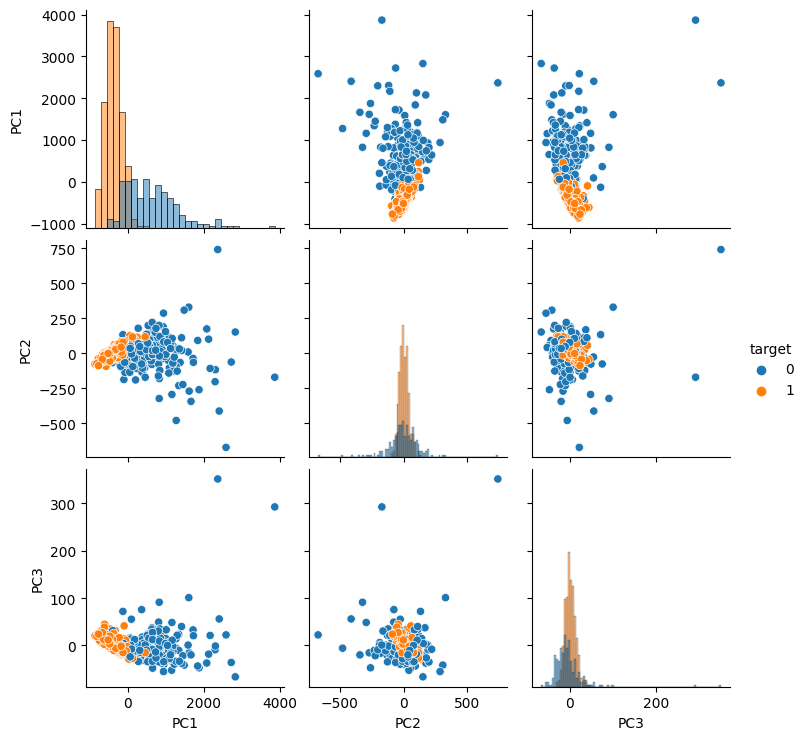

In [8]:
# Visualizar graficamente
X = pca.transform(df)

new_df = pd.DataFrame(X, columns=['PC1', 'PC2', 'PC3'])
new_df['target'] = data['target']   
sns.pairplot(new_df, hue='target', vars=['PC1', 'PC2', 'PC3'], diag_kind='hist')
plt.show()

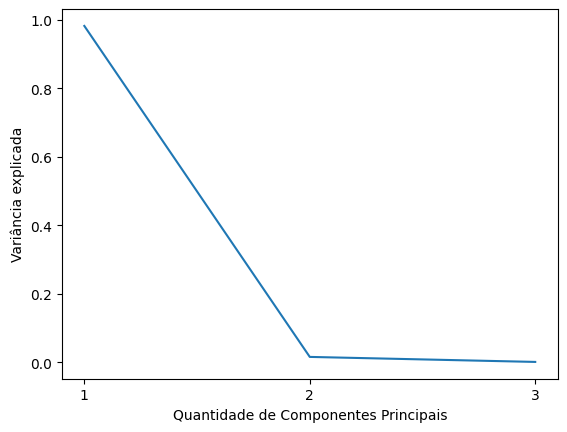

In [9]:
n_vectors = list (range(1, len(pca.explained_variance_ratio_)+1))
plt.xticks(n_vectors)
plt.plot(n_vectors, pca.explained_variance_ratio_)
plt.xlabel('Quantidade de Componentes Principais')
plt.ylabel('Variância explicada')
plt.show()

### Amostragem do conjunto de dados

In [11]:
# Amostragem sem reposição
df_amostra_sr = df.sample(frac=0.3, replace=False)
print("Tamanho da amostra", df_amostra_sr.shape)
print("Primeiro Elemento sorteado:\n", df_amostra_sr.head())

Tamanho da amostra (171, 30)
Primeiro Elemento sorteado:
      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
504        9.268         12.87           61.49      248.7          0.16340   
447       14.800         17.66           95.88      674.8          0.09179   
101        6.981         13.43           43.79      143.5          0.11700   
79        12.860         18.00           83.19      506.3          0.09934   
322       12.860         13.32           82.82      504.8          0.11340   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
504           0.22390         0.09730              0.05252         0.2378   
447           0.08890         0.04069              0.02260         0.1893   
101           0.07568         0.00000              0.00000         0.1930   
79            0.09546         0.03889              0.02315         0.1718   
322           0.08834         0.03800              0.03400         0.1543   

     mean 

In [13]:
# Normalização por Z-score (média e desvio padrão)
scaler = StandardScaler()
scaler.fit(df)
df_scaled_z = scaler.transform(df)
print(df_scaled_z[:,1])

[-2.07333501e+00 -3.53632408e-01  4.56186952e-01  2.53732112e-01
 -1.15181643e+00 -8.35335303e-01  1.60649427e-01  3.58450132e-01
  5.88829778e-01  1.10543868e+00  9.19273310e-01 -3.25707603e-01
  1.28229578e+00  1.08449508e+00  7.72668081e-01  1.91991217e+00
  1.95555434e-01  3.23544126e-01  6.65622993e-01 -1.14716230e+00
 -8.33008236e-01 -1.59395919e+00 -1.17043297e+00  8.72731967e-01
  4.86438824e-01 -6.72440605e-01  5.21344831e-01  2.23480239e-01
  1.39166794e+00 -9.86594667e-01  1.35443486e+00 -1.37215165e-01
  1.09147628e+00  1.67091599e+00 -3.28034670e-01  5.35307234e-01
  5.65559107e-01 -2.02373045e-01  1.37537847e+00  3.56123065e-01
  5.32980167e-01  4.79457623e-01  1.28462285e+00  2.30461440e-01
  5.86502711e-01 -3.93192549e-01 -5.70049651e-01 -1.46523434e-01
 -1.08433149e+00  7.00529000e-01  5.37634301e-01 -6.86403007e-01
 -2.44260253e-01 -1.37215165e-01  6.35371121e-01 -1.25579830e-01
 -1.67467038e-01  5.35307234e-01  4.73592923e-03 -1.74521855e+00
 -1.02615481e+00  3.93356

In [14]:
# Normalização por MinMax (valores entre 0 e 1)
scaler = MinMaxScaler()
scaler.fit(df)
df_scaled_m = scaler.transform(df)
print(df_scaled_m[:,1])

[0.0226581  0.27257355 0.3902604  0.36083869 0.15657761 0.20257017
 0.34731146 0.37605681 0.40953669 0.48461278 0.45755834 0.27663172
 0.51031451 0.48156916 0.43625296 0.60297599 0.35238417 0.37098411
 0.42069665 0.15725397 0.20290835 0.0923233  0.15387217 0.45079472
 0.39465675 0.22624281 0.39972946 0.35644234 0.526209   0.18058843
 0.52079811 0.30402435 0.4825837  0.56679067 0.27629354 0.40175854
 0.40615489 0.29455529 0.52384173 0.37571863 0.40142036 0.3936422
 0.51065269 0.35745688 0.40919851 0.26682448 0.24112276 0.30267163
 0.16638485 0.42576936 0.40209672 0.22421373 0.28846804 0.30402435
 0.4163003  0.30571525 0.299628   0.40175854 0.32465336 0.07034156
 0.17483936 0.38112952 0.42069665 0.14034494 0.47784917 0.48123098
 0.38214406 0.31552249 0.25769361 0.22928644 0.39228948 0.16672303
 0.50084545 0.2056138  0.23030098 0.3361515  0.04159621 0.2177883
 0.48224552 0.28035171 0.38079134 0.20798106 0.51403449 0.56070342
 0.20087927 0.2979371  0.39736219 0.50321272 0.40886033 0.187013

### Detecção de Outliers (anomalias)

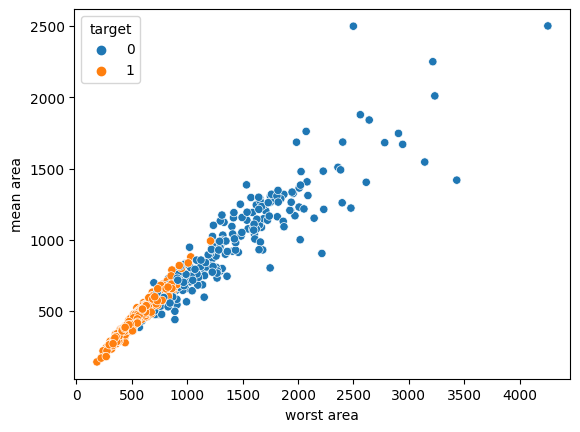

In [15]:
# Visualização gráfica dos dados (2 maiores auto-vetores do PCI)
# preparar o conjunto de dados
df_tg = df
df_tg['target'] = data['target']
# criar gráfico
sns.scatterplot(data=df_tg, x='worst area', y='mean area', hue='target');

In [16]:
# Criar classificador de outliers
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_prod = clf.fit_predict(df)
X_score = clf.negative_outlier_factor_

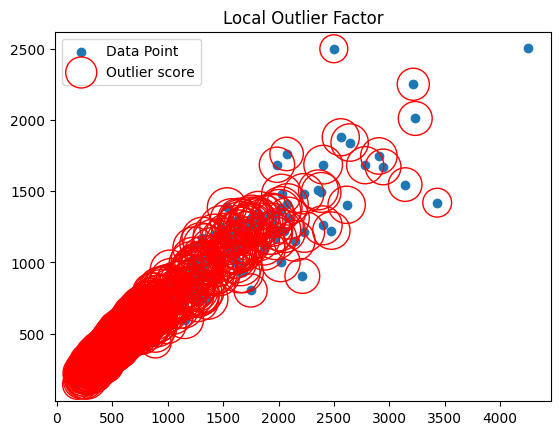

In [23]:
# Gráfico das amostras com seu "raio de outliet"
plt.scatter(df["worst area"], df["mean area"], label="Data Point")
radius  = (X_score.max() - X_score) / (X_score.max() - X_score.min())
radius2 = (X_score - X_score.min()) / (X_score.max() - X_score.min())
scatter = plt.scatter(
    df["worst area"], 
    df["mean area"], 
    s=1000 * radius2, 
    edgecolors="r", 
    facecolors="none", 
    label = "Outlier score"
)
plt.legend()
plt.title("Local Outlier Factor")
plt.show()

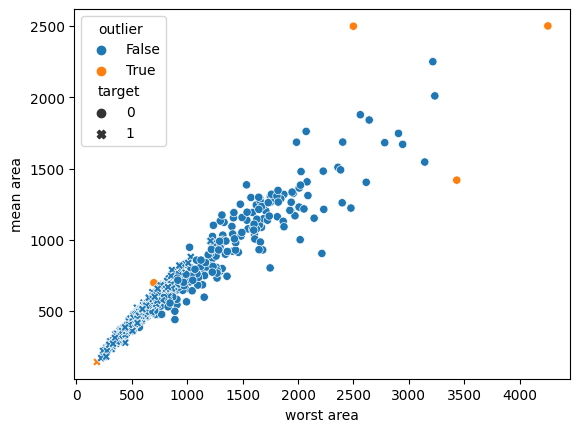

In [28]:
# Classificando os outliers graficamente
df_tg["outlier score"] = X_score
df_tg["outlier"] = df_tg["outlier score"] < -2

# Visualizando os dados graficamente
sns.scatterplot(data=df_tg, x='worst area', y='mean area', hue='outlier', style='target');

In [29]:
# Verificando as amostras classificadas como outliers
df_tg.loc[df_tg["outlier"] == True]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,outlier score,radius,outlier
38,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,...,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,0,-2.233358,True,True
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382,1,-2.141954,True,True
212,28.110,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525,...,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525,0,-2.251552,True,True
265,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,0.05674,...,0.14010,0.26440,0.34420,0.16590,0.2868,0.08218,0,-2.191808,True,True
461,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,0.2061,0.05623,...,0.13570,0.42560,0.68330,0.26250,0.2641,0.07427,0,-3.134467,True,True
